In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message=".*FigureCanvasAgg is non-interactive.*"
)
import os
os.environ["NIXTLA_ID_AS_COL"] = "true"
import numpy as np
np.set_printoptions(suppress=True)
np.random.seed(1)
import random
random.seed(1)
import pandas as pd
pd.set_option("max_colwidth", 100)
pd.set_option("display.precision", 3)
from utilsforecast.plotting import plot_series as plot_series_utils
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams.update({
    "figure.figsize": (8, 5),
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "figure.constrained_layout.use": True,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "legend.title_fontsize": 10,
})
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=["#000000", "#000000"])
from fpppy.utils import plot_series

In [3]:
x = [34, 142, 12, 13, 414]
yr = list(range(2020,2025))
df = pd.DataFrame({"Year": yr, "Observation": x})
df.set_index("Year", inplace=True)
df

,Observation
Year,
2020,34
2021,142
2022,12
2023,13
2024,414


## montly dataset uses strftime

In [4]:
df["Month"] = pd.to_datetime(
    ['2019-01-01','2019-02-01','2019-03-01','2019-04-01','2019-05-01']
)
df

,Observation,Month
Year,,
2020,34,2019-01-01
2021,142,2019-02-01
2022,12,2019-03-01
2023,13,2019-04-01
2024,414,2019-05-01


In [5]:
df['Month'] = df['Month'].dt.strftime("%Y, %b")
df

,Observation,Month
Year,,
2020,34,"2019, Jan"
2021,142,"2019, Feb"
2022,12,"2019, Mar"
2023,13,"2019, Apr"
2024,414,"2019, May"


## Time plots:

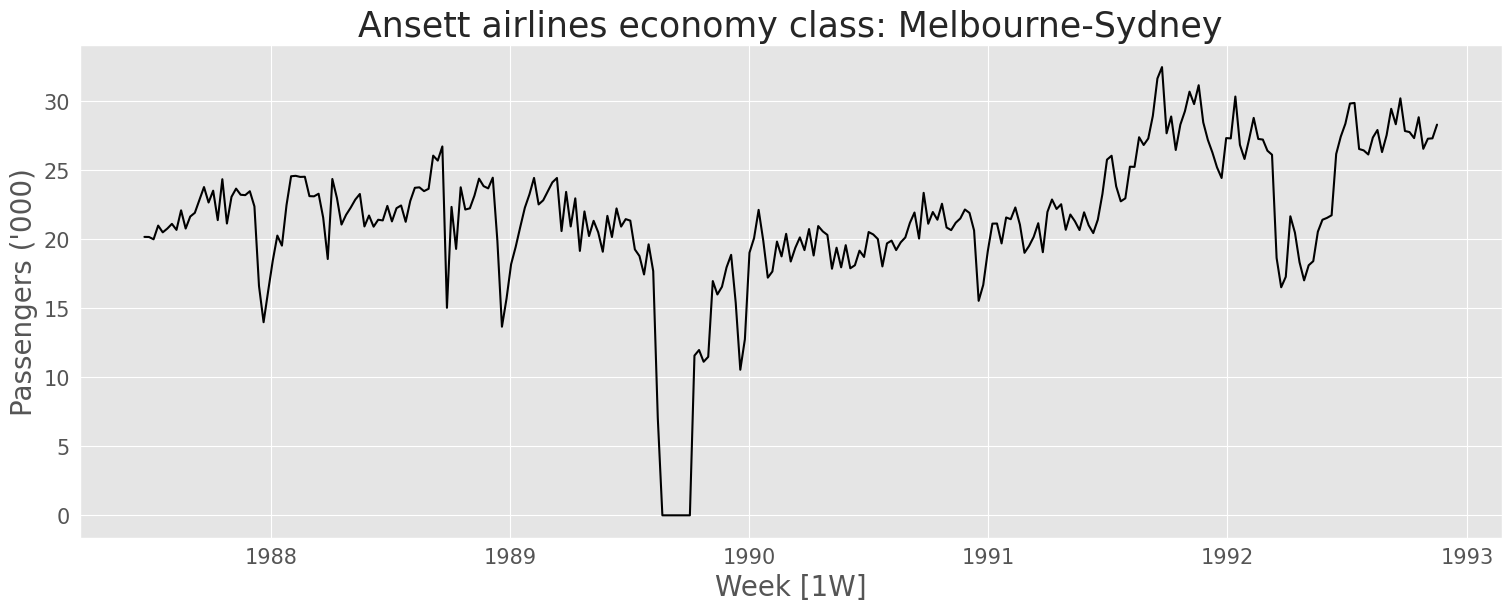

In [6]:
ansett = pd.read_csv("data/ansett.csv")
ansett["ds"] = pd.to_datetime(ansett["ds"])
melsyd_economy = ansett.query(
        'Airports == "MEL-SYD" & Class == "Economy"'
    ).copy()
melsyd_economy["y"] = melsyd_economy["y"] / 1000

plot_series(df=melsyd_economy,
            id_col="Airports",
            time_col="ds",
            target_col="y",
            ylabel="Passengers ('000)",
            xlabel="Week [1W]",
            title="Ansett airlines economy class: Melbourne-Sydney"
           )

In [10]:
total_cost_df = pd.read_csv("data/total_cost_df.csv")
total_cost_df

,Month,TotalC,Cost
0,1991-07-01,3.527e+06,3.53
1,1991-08-01,3.181e+06,3.18
2,1991-09-01,3.252e+06,3.25
3,1991-10-01,3.611e+06,3.61
4,1991-11-01,3.566e+06,3.57
...,...,...,...
199,2008-02-01,2.165e+07,21.65
200,2008-03-01,1.826e+07,18.26
201,2008-04-01,2.311e+07,23.11
202,2008-05-01,2.291e+07,22.91


In [16]:
pbs = pd.read_csv("data/PBS_unparsed.csv")
pbs["Month"] = pd.to_datetime(pbs["Month"])
pbs.head()

,Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
0,1991-07-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,18228,67877.0
1,1991-08-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15327,57011.0
2,1991-09-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14775,55020.0
3,1991-10-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15380,57222.0
4,1991-11-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14371,52120.0


In [17]:
a10 = pbs.query('ATC2 == "A10"')
a10 = a10.filter(["Month", "Concession", "Type", "Cost"])
a10.head()

,Month,Concession,Type,Cost
1524,1991-07-01,Concessional,Co-payments,2.093e+06
1525,1991-08-01,Concessional,Co-payments,1.796e+06
1526,1991-09-01,Concessional,Co-payments,1.777e+06
1527,1991-10-01,Concessional,Co-payments,1.849e+06
1528,1991-11-01,Concessional,Co-payments,1.686e+06


In [18]:
total_cost_df = a10.groupby("Month", as_index=False).agg({"Cost": "sum"})
total_cost_df.rename(columns={"Cost": "TotalC"}, inplace=True)
total_cost_df.head()

,Month,TotalC
0,1991-07-01,3.527e+06
1,1991-08-01,3.181e+06
2,1991-09-01,3.252e+06
3,1991-10-01,3.611e+06
4,1991-11-01,3.566e+06


In [19]:
total_cost_df = total_cost_df.assign(
    Cost = round(total_cost_df["TotalC"] / 1e6, 2)
)
total_cost_df.head()

,Month,TotalC,Cost
0,1991-07-01,3.527e+06,3.53
1,1991-08-01,3.181e+06,3.18
2,1991-09-01,3.252e+06,3.25
3,1991-10-01,3.611e+06,3.61
4,1991-11-01,3.566e+06,3.57


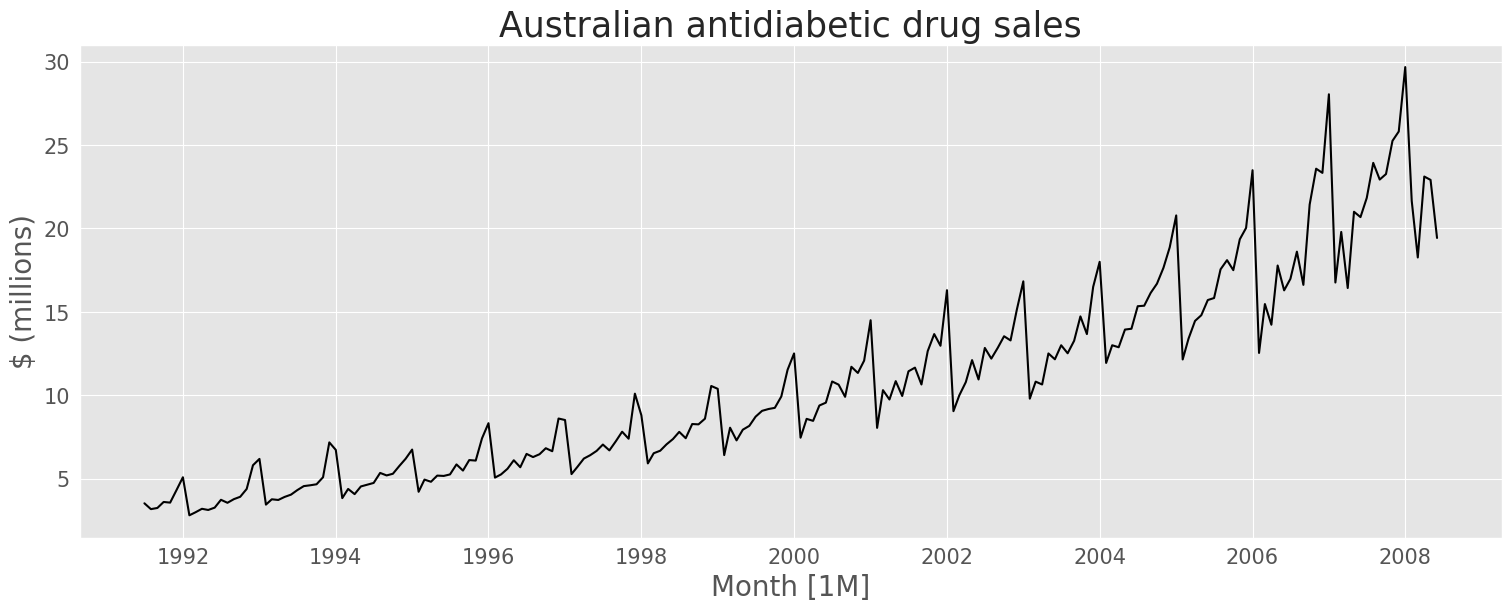

In [20]:
total_cost_df["unique_id"] = "total_cost" # Create a unique id column
plot_series(total_cost_df,
            id_col="unique_id",
            time_col="Month",
            target_col="Cost",
            xlabel="Month [1M]",
            ylabel="$ (millions)",
            title="Australian antidiabetic drug sales")

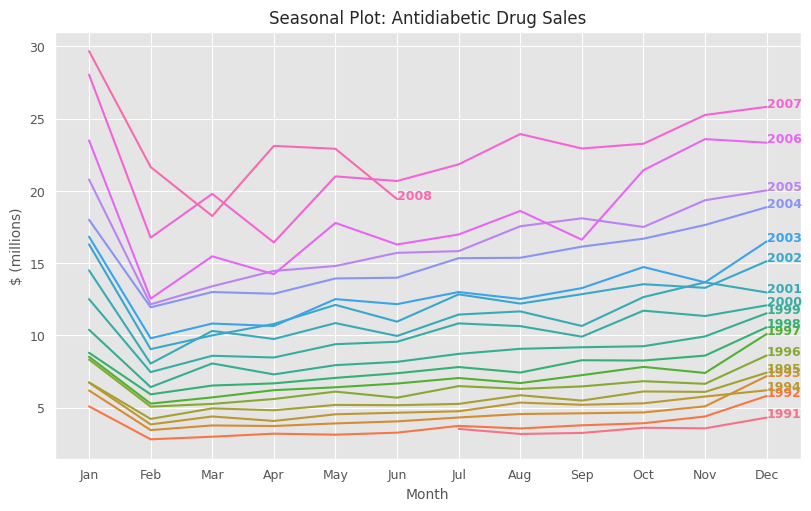

In [21]:
total_cost_df["Month_name"] = total_cost_df["Month"].dt.strftime("%b")
total_cost_df["Year"] = total_cost_df["Month"].dt.year
total_cost_df["Month_num"] = total_cost_df["Month"].dt.month

unique_years = total_cost_df["Year"].unique()
year_palette = sns.color_palette("husl", n_colors=len(unique_years))

fig, ax = plt.subplots()
sns.lineplot(
    data=total_cost_df,
    x="Month_num",
    y="Cost",
    hue="Year",
    palette=year_palette,
    legend=False,
    ax=ax,
)
ax.set_title("Seasonal Plot: Antidiabetic Drug Sales")
ax.set_xlabel("Month")
ax.set_ylabel("$ (millions)")
ax.set_xticks(
    ticks=range(1, 13),
    labels=[
        "Jan", "Feb", "Mar", "Apr", "May", "Jun",
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ],
)

min_year = unique_years.min()
for year, subset in total_cost_df.groupby("Year"):
    ax.text(
        subset["Month_num"].iloc[-1],
        subset["Cost"].iloc[-1],
        str(year),
        fontsize=9,
        weight="bold",
        color=year_palette[year - min_year],
    )

fig.show()

In [ ]:
vic_elec_df = pd.read_csv("data/vic_elec.csv")
vic_elec_df["ds"] = pd.to_datetime(vic_elec_df["ds"])
vic_elec_demand = vic_elec_df[vic_elec_df["unique_id"] == "Demand"].copy()
vic_elec_demand["hour-minute"] = \
  vic_elec_demand["ds"].dt.strftime("%H:%M:%S")
vic_elec_demand["day"] = vic_elec_demand["ds"].dt.date

fig, ax = plt.subplots()
sns.lineplot(
    data=vic_elec_demand,
    x="hour-minute",
    y="y",
    hue="day",
    palette="husl",
    legend=False,
    ax=ax,
)
unique_ticks = vic_elec_demand["hour-minute"].unique()
ticks_to_plot = unique_ticks[::2]
ax.set_xticks(ticks=range(0, len(unique_ticks), 2), labels=ticks_to_plot,
    rotation=45)
ax.set_title("Electricity Demand: Victoria")
ax.set_xlabel("Time")
ax.set_ylabel("MWh")
fig.show()